# Titanic competition

## Data preparation

In [1]:
import pandas as pd
import numpy as np
tit1 = pd.read_csv("train.csv")

In [2]:
tit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train_selection = tit1[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin']]

In [4]:
train_selection

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,male,22.0,1,0,7.2500,NaN
1,2,1,1,female,38.0,1,0,71.2833,C85
2,3,1,3,female,26.0,0,0,7.9250,NaN
3,4,1,1,female,35.0,1,0,53.1000,C123
4,5,0,3,male,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN
887,888,1,1,female,19.0,0,0,30.0000,B42
888,889,0,3,female,NaN,1,2,23.4500,NaN
889,890,1,1,male,26.0,0,0,30.0000,C148


C:\Users\alask\AppData\Local\Temp\ipykernel_26452\812103503.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_selection.corr())


<Axes: >

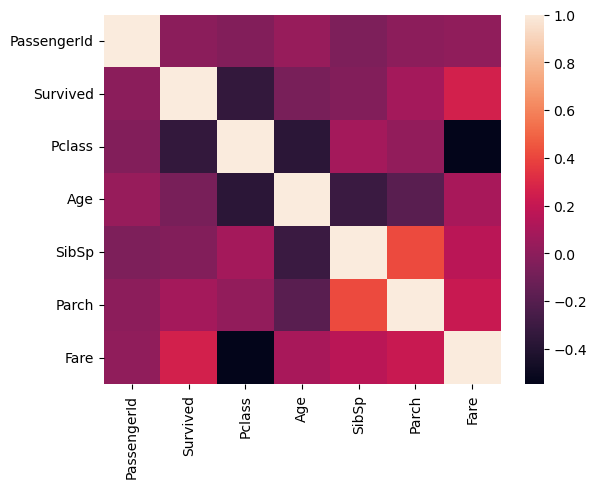

In [5]:
import seaborn as sns
sns.heatmap(train_selection.corr())

In [6]:
train_selection.duplicated().sum()

0

In [7]:
#there's no duplictated rows 

In [8]:
sex_to_replace = {"male": 0, "female": 1}

train_selection["sex_replaced"] = train_selection["Sex"].replace(sex_to_replace)

C:\Users\alask\AppData\Local\Temp\ipykernel_26452\3805460976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_selection["sex_replaced"] = train_selection["Sex"].replace(sex_to_replace)


In [9]:
train_selection[["sex_replaced","Sex"]]

,sex_replaced,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,1,female
889,0,male


In [10]:
train_selection["sex_replaced"].value_counts()

0    577
1    314
Name: sex_replaced, dtype: int64

In [11]:
train_selection["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
train_selection[['sex_replaced','Survived']].corr()

,sex_replaced,Survived
sex_replaced,1.000000,0.543351
Survived,0.543351,1.000000


In [13]:
#The correlation of sex and survival seems to be high

In [14]:
train_selection['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [15]:
train_selection['parch_replaced'] = np.where(train_selection['Parch'] > 0, 1, train_selection['Parch'])

C:\Users\alask\AppData\Local\Temp\ipykernel_26452\1059884201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_selection['parch_replaced'] = np.where(train_selection['Parch'] > 0, 1, train_selection['Parch'])


In [16]:
train_selection[['parch_replaced','Parch']]

,parch_replaced,Parch
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
886,0,0
887,0,0
888,1,2
889,0,0


In [17]:
train_selection['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [18]:
train_selection['parch_replaced'].value_counts()

0    678
1    213
Name: parch_replaced, dtype: int64

In [19]:
train_selection['ischild'] = np.where(train_selection['Age'] < 15, 1, 0)

In [20]:
train_selection['Age'][train_selection['ischild']==1]

7       2.00
9      14.00
10      4.00
14     14.00
16      2.00
       ...  
827     1.00
831     0.83
850     4.00
852     9.00
869     4.00
Name: Age, Length: 78, dtype: float64

In [21]:
train_selection['Age'][train_selection['Age'] < 15].mean()

5.816282051282052

In [22]:
train_selection['Age'][train_selection['ischild']==1].max()

14.5

In [23]:
train_selection['Age'][train_selection['Age'].isna()] = train_selection['Age'].mean()

C:\Users\alask\AppData\Local\Temp\ipykernel_26452\34805730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_selection['Age'][train_selection['Age'].isna()] = train_selection['Age'].mean()


In [24]:
train_selection['Age'].isna().sum() 

0

In [25]:
train_selection['Age'][train_selection['Age'] >= 15].mean() 

31.99045980753925

In [26]:
train_selection['Age'][train_selection['Age'] < 15].mean() #checking that children's age mean hasn't changed

5.816282051282052

In [27]:
#Generating variable for identifying people with age more than 60

train_selection['isold'] = np.where(train_selection['Age'] > 60, 1, 0)

In [28]:
train_selection['isold'].value_counts()

0    869
1     22
Name: isold, dtype: int64

In [29]:
train_selection[train_selection['Age'] > 60]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,sex_replaced,parch_replaced,ischild,isold
33,34,0,2,male,66.0,0,0,10.5000,NaN,0,0,0,1
54,55,0,1,male,65.0,0,1,61.9792,B30,0,1,0,1
96,97,0,1,male,71.0,0,0,34.6542,A5,0,0,0,1
116,117,0,3,male,70.5,0,0,7.7500,NaN,0,0,0,1
170,171,0,1,male,61.0,0,0,33.5000,B19,0,0,0,1
252,253,0,1,male,62.0,0,0,26.5500,C87,0,0,0,1
275,276,1,1,female,63.0,1,0,77.9583,D7,1,0,0,1
280,281,0,3,male,65.0,0,0,7.7500,NaN,0,0,0,1
326,327,0,3,male,61.0,0,0,6.2375,NaN,0,0,0,1
438,439,0,1,male,64.0,1,4,263.0000,C23 C25 C27,0,1,0,1


In [30]:
train_selection[['ischild','isold','Survived']].corr()

,ischild,isold,Survived
ischild,1.000000,-0.049284,0.122978
isold,-0.049284,1.000000,-0.051224
Survived,0.122978,-0.051224,1.000000


In [31]:
#No correlation between survival and being a child or an older person. We should examine this a bit deeper

# Diagnostic analysis and data engineering

In [32]:
train_selection[['parch_replaced','Survived']].corr()

,parch_replaced,Survived
parch_replaced,1.000000,0.147408
Survived,0.147408,1.000000


In [33]:
#Let's normilize the ticket fare 

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler() 

x = train_selection['Fare'].values.reshape(-1, 1) 
min_max_scaler.fit(x) 
x_minmax_scaled = min_max_scaler.transform(x)

In [34]:
train_selection['fare_norm'] = pd.DataFrame(x_minmax_scaled)

In [35]:
train_selection[['Fare','fare_norm']]

,Fare,fare_norm
0,7.2500,0.014151
1,71.2833,0.139136
2,7.9250,0.015469
3,53.1000,0.103644
4,8.0500,0.015713
...,...,...
886,13.0000,0.025374
887,30.0000,0.058556
888,23.4500,0.045771
889,30.0000,0.058556


In [36]:
train_selection[['fare_norm','Survived']].corr()

,fare_norm,Survived
fare_norm,1.000000,0.257307
Survived,0.257307,1.000000


In [37]:
train_selection[['Fare','Survived']].corr()

,Fare,Survived
Fare,1.000000,0.257307
Survived,0.257307,1.000000


In [38]:
train_selection[['Pclass','Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


<Axes: xlabel='sex_replaced', ylabel='Survived'>

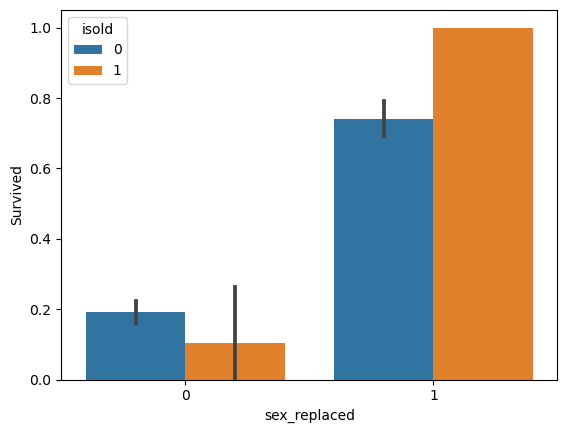

In [39]:
#Let's see some visaulisation

sns.barplot(x='sex_replaced', y ='Survived', hue='isold', data=train_selection)

<Axes: xlabel='sex_replaced', ylabel='Survived'>

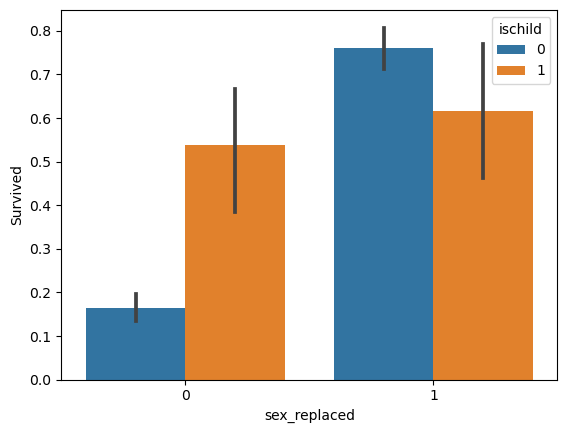

In [40]:
#So older women have more chances on survival. And older men have chances even worse than average men does.
#Let's see what about children

sns.barplot(x='sex_replaced', y ='Survived', hue='ischild', data=train_selection)

<Axes: xlabel='ischild', ylabel='Survived'>

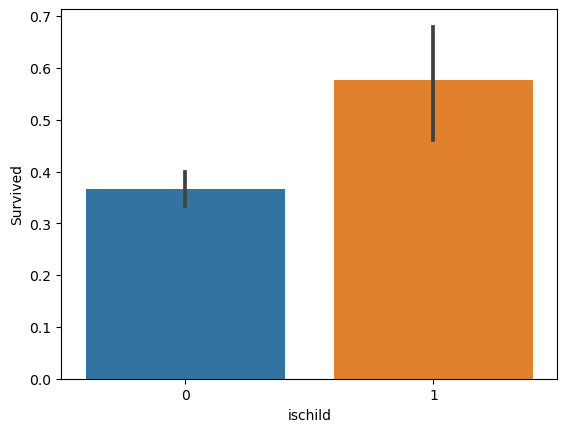

In [41]:
sns.barplot(x='ischild', y ='Survived', data=train_selection)

In [42]:
#Perhaps we should consider "child" as other type of sex 
#because it has no proper correlation with male and female survival (it's quite logic though)

#Let's see if children of an early age have better chances of survival

train_selection['isbaby'] = np.where(train_selection['Age'] < 4, 1, 0)

In [43]:
train_selection[['isbaby','Age']][train_selection['Age']<5]

,isbaby,Age
7,1,2.00
10,0,4.00
16,1,2.00
43,1,3.00
63,0,4.00
78,1,0.83
119,1,2.00
164,1,1.00
171,0,4.00
172,1,1.00


<Axes: xlabel='ischild', ylabel='Survived'>

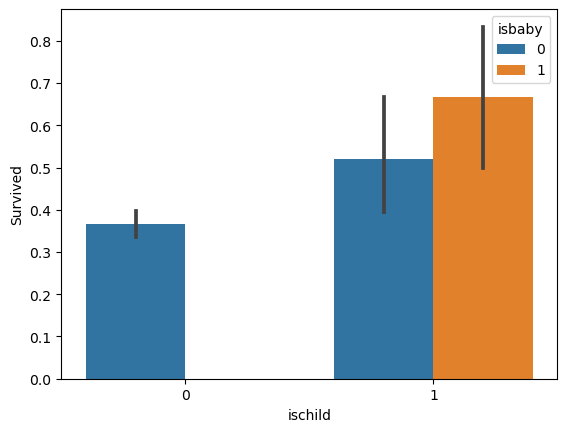

In [44]:
sns.barplot(x='ischild', y ='Survived', hue='isbaby', data=train_selection)

In [45]:
#Yes, chances for babies are higher.

train_selection['isolderwoman'] = np.where((train_selection['isold'] == True)&(train_selection['sex_replaced'] == 1), 1, 0)

<Axes: xlabel='Pclass', ylabel='Survived'>

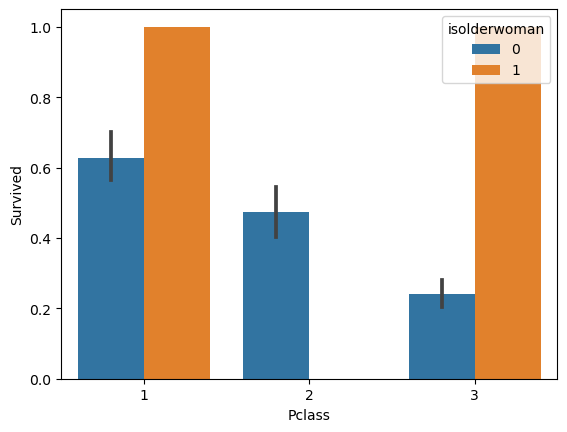

In [46]:
sns.barplot(x='Pclass', y ='Survived', hue='isolderwoman', data=train_selection)

In [47]:
#Isn't is nice to be rich? Especially when you're an older woman!

<Axes: xlabel='Pclass', ylabel='Survived'>

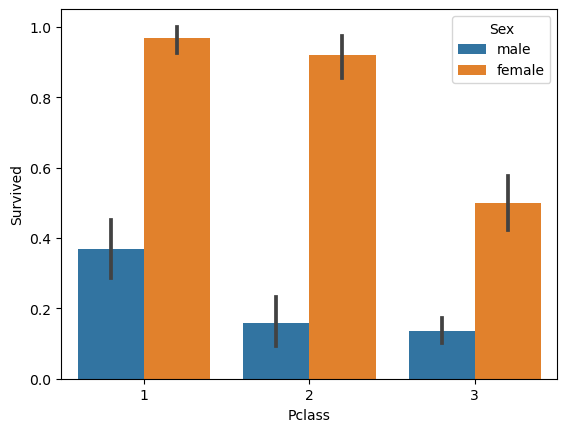

In [48]:
sns.barplot(x='Pclass', y ='Survived', hue='Sex', data=train_selection)

<Axes: xlabel='Pclass', ylabel='Survived'>

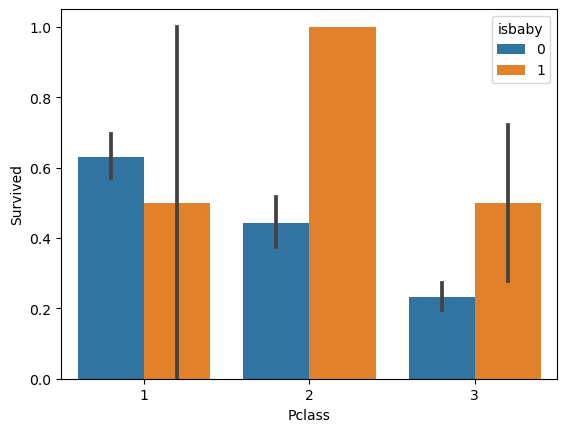

In [49]:
sns.barplot(x='Pclass', y ='Survived', hue='isbaby', data=train_selection)

In [50]:
#Seems a little bit strange that 1 class babies don't have good chanses on survival. 
#Perhaps it can be related on travelling with nannies?

In [51]:
train_selection[['Parch','Survived']][(train_selection['Pclass'] == 1) &( train_selection['isbaby'] == 1)]

,Parch,Survived
297,2,0
305,2,1


In [52]:
#It makes sense, too little babies for any conclusion

<Axes: xlabel='parch_replaced', ylabel='Survived'>

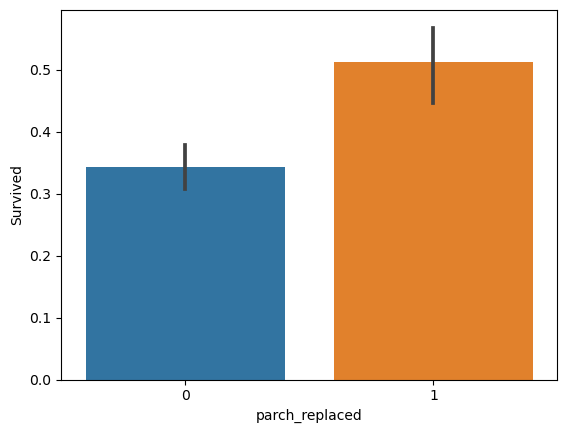

In [53]:
sns.barplot(x='parch_replaced', y ='Survived', data=train_selection)

<Axes: xlabel='SibSp', ylabel='Survived'>

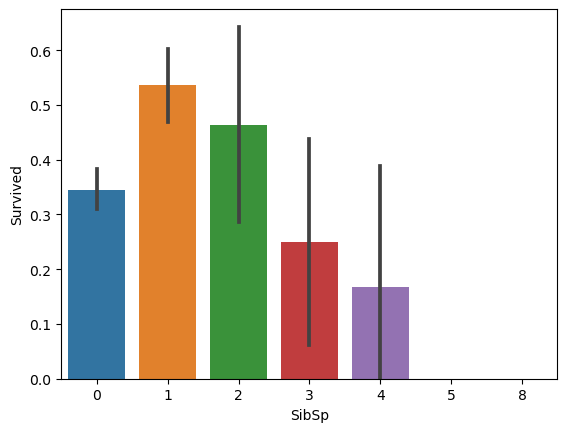

In [54]:
sns.barplot(x='SibSp', y ='Survived', data=train_selection)

<Axes: xlabel='Parch', ylabel='Survived'>

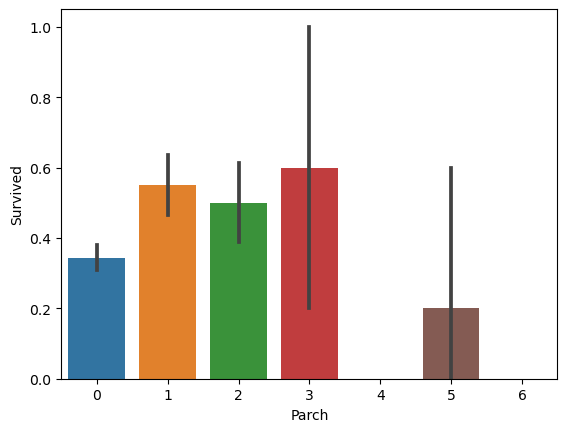

In [55]:
sns.barplot(x='Parch', y ='Survived', data=train_selection)

In [56]:
#Large families seem to survive worse though little families survive better than singles.

In [57]:
train_selection['fam_members'] = train_selection['Parch'] + train_selection['SibSp']

<Axes: xlabel='fam_members', ylabel='Survived'>

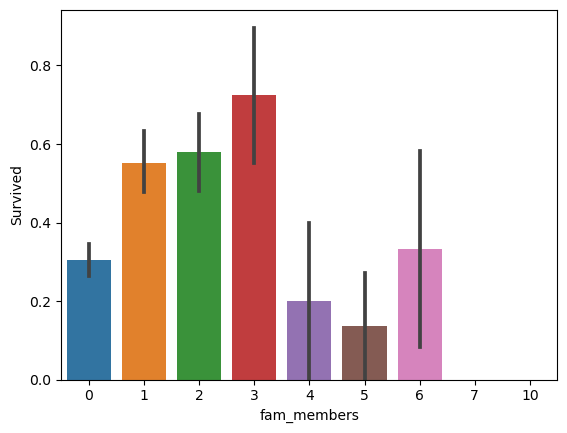

In [58]:
sns.barplot(x='fam_members', y ='Survived', data=train_selection)

In [59]:
train_selection[train_selection['fam_members'] > 3].count()

PassengerId       62
Survived          62
Pclass            62
Sex               62
Age               62
SibSp             62
Parch             62
Fare              62
Cabin              6
sex_replaced      62
parch_replaced    62
ischild           62
isold             62
fare_norm         62
isbaby            62
isolderwoman      62
fam_members       62
dtype: int64

In [60]:
train_selection['littlefamily'] = np.where((train_selection['fam_members'] > 0)&(train_selection['fam_members'] < 4), 1, 0)

<Axes: xlabel='littlefamily', ylabel='Survived'>

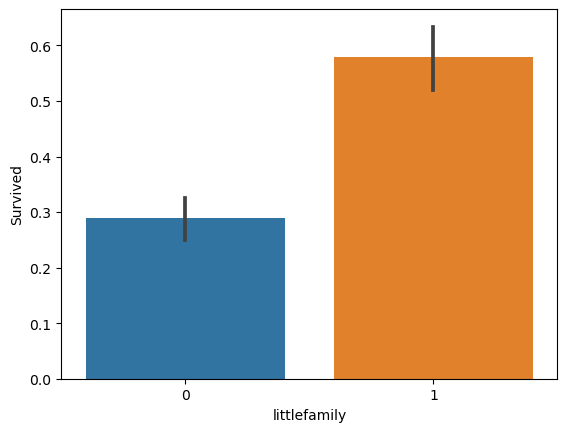

In [61]:
sns.barplot(x='littlefamily', y ='Survived', data=train_selection)

In [62]:
train_selection.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'sex_replaced',
 'parch_replaced',
 'ischild',
 'isold',
 'fare_norm',
 'isbaby',
 'isolderwoman',
 'fam_members',
 'littlefamily']

In [63]:
train_slct = train_selection[['Survived','sex_replaced','ischild','fare_norm','isbaby','isolderwoman','Pclass','littlefamily']]

In [64]:
train_slct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   sex_replaced  891 non-null    int64  
 2   ischild       891 non-null    int32  
 3   fare_norm     891 non-null    float64
 4   isbaby        891 non-null    int32  
 5   isolderwoman  891 non-null    int32  
 6   Pclass        891 non-null    int64  
 7   littlefamily  891 non-null    int32  
dtypes: float64(1), int32(4), int64(3)
memory usage: 41.9 KB


## Selecting the most accurate predicting model

In [65]:
#let's train and test LogisticRegression model

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

seed=467

log_reg_1 = LogisticRegression()

X1 = train_slct[['sex_replaced','ischild','fare_norm','isbaby','isolderwoman','Pclass','littlefamily']]
Y1 = train_slct[['Survived']]

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=seed, shuffle=True)

log_reg_1.fit(X1_train, Y1_train)

Y1_predicted = log_reg_1.predict(X1_test)

print('Accuracy: %.2f%%' % (accuracy_score(Y1_test, Y1_predicted)*100))

Accuracy: 81.56%


C:\Users\alask\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
## KNeighbors Model

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

kfold = model_selection.KFold(n_splits=2, random_state=seed, shuffle=True)
model1 = KNeighborsClassifier()
model1.fit(X1_test,Y1_test)
y_pred = model1.predict(X1_train)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y1_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


C:\Users\alask\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [67]:
## Gaussian Model

from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB

kfold = model_selection.KFold(n_splits=2, random_state=None, shuffle=True)
model2 = GaussianNB()
model2.fit(X1_train,Y1_train)
y_pred = model2.predict(X1_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y1_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.57%


C:\Users\alask\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
## Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=467, shuffle=True)

kfold = model_selection.KFold(n_splits=2, random_state=None, shuffle=True)
model3 = LinearDiscriminantAnalysis()
model3.fit(X1_train,Y1_train)
y_pred = model3.predict(X1_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y1_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.56%


C:\Users\alask\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
#LogisticRegression's accuracy score is the best

## Test dataframe data preparation

In [70]:
test_tit = pd.read_csv("test.csv")

In [71]:
test_tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [72]:
test_selection = test_tit[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin']]

In [73]:
test_selection

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,892,3,male,34.5,0,0,7.8292,NaN
1,893,3,female,47.0,1,0,7.0000,NaN
2,894,2,male,62.0,0,0,9.6875,NaN
3,895,3,male,27.0,0,0,8.6625,NaN
4,896,3,female,22.0,1,1,12.2875,NaN
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,NaN
414,1306,1,female,39.0,0,0,108.9000,C105
415,1307,3,male,38.5,0,0,7.2500,NaN
416,1308,3,male,NaN,0,0,8.0500,NaN


In [74]:
test_selection.duplicated().sum()

0

In [75]:
#no duplicates. 
#Let's make some dummy variables and features engineering similarly to train_selection dataset.

In [76]:
sex_to_replace = {"male": 0, "female": 1}

test_selection["sex_replaced"] = test_selection["Sex"].replace(sex_to_replace)

C:\Users\alask\AppData\Local\Temp\ipykernel_26452\1418445134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selection["sex_replaced"] = test_selection["Sex"].replace(sex_to_replace)


In [77]:
test_selection['parch_replaced'] = np.where(test_selection['Parch'] > 0, 1, test_selection['Parch'])


C:\Users\alask\AppData\Local\Temp\ipykernel_26452\2595509879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selection['parch_replaced'] = np.where(test_selection['Parch'] > 0, 1, test_selection['Parch'])


In [78]:
test_selection['ischild'] = np.where(test_selection['Age'] < 15, 1, 0)

In [79]:
test_selection['Age'].isna().sum() 

86

In [80]:
test_selection['Age'][test_selection['Age'].isna()] = test_selection['Age'].mean()

C:\Users\alask\AppData\Local\Temp\ipykernel_26452\467570740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selection['Age'][test_selection['Age'].isna()] = test_selection['Age'].mean()


In [81]:
test_selection['Age'].isna().sum()

0

In [82]:
#Generating variable for identifying people with age more than 60

test_selection['isold'] = np.where(test_selection['Age'] > 60, 1, 0)

In [83]:
#Let's normilize the ticket fare 

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler() 

x = test_selection['Fare'].values.reshape(-1, 1) 
min_max_scaler.fit(x) 
x_minmax_scaled = min_max_scaler.transform(x)


test_selection['fare_norm'] = pd.DataFrame(x_minmax_scaled)

In [84]:
#Generarting dummy variable for babies

test_selection['isbaby'] = np.where(test_selection['Age'] < 4, 1, 0)

In [85]:
test_selection['isolderwoman'] = np.where((test_selection['isold'] == True)&(test_selection['sex_replaced'] == 1), 1, 0)

In [86]:
test_selection['fam_members'] = test_selection['Parch'] + test_selection['SibSp']

test_selection['littlefamily'] = np.where((test_selection['fam_members'] > 0)&(test_selection['fam_members'] < 4), 1, 0)


In [87]:
test_selection.columns.to_list()

['PassengerId',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'sex_replaced',
 'parch_replaced',
 'ischild',
 'isold',
 'fare_norm',
 'isbaby',
 'isolderwoman',
 'fam_members',
 'littlefamily']

In [88]:
test_slct = test_selection[['PassengerId','sex_replaced','ischild','fare_norm','isbaby','isolderwoman','Pclass','littlefamily']]

In [89]:
test_slct

,PassengerId,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily
0,892,0,0,0.015282,0,0,3,0
1,893,1,0,0.013663,0,0,3,1
2,894,0,0,0.018909,0,0,2,0
3,895,0,0,0.016908,0,0,3,0
4,896,1,0,0.023984,0,0,3,1
...,...,...,...,...,...,...,...,...
413,1305,0,0,0.015713,0,0,3,0
414,1306,1,0,0.212559,0,0,1,0
415,1307,0,0,0.014151,0,0,3,0
416,1308,0,0,0.015713,0,0,3,0


# Prediction 

In [90]:
pred_frame = test_slct[['sex_replaced','ischild','fare_norm','isbaby','isolderwoman','Pclass','littlefamily']]

pred_frame.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex_replaced  418 non-null    int64  
 1   ischild       418 non-null    int32  
 2   fare_norm     417 non-null    float64
 3   isbaby        418 non-null    int32  
 4   isolderwoman  418 non-null    int32  
 5   Pclass        418 non-null    int64  
 6   littlefamily  418 non-null    int32  
dtypes: float64(1), int32(4), int64(2)
memory usage: 16.5 KB


In [91]:
pred_frame.isnull().sum()

sex_replaced    0
ischild         0
fare_norm       1
isbaby          0
isolderwoman    0
Pclass          0
littlefamily    0
dtype: int64

In [92]:
pred_frame[pred_frame['fare_norm'].isnull()]

,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily
152,0,0,NaN,0,0,3,0


In [93]:
pred_frame['fare_norm'][pred_frame['fare_norm'].isnull()] = pred_frame['fare_norm'].mean()

C:\Users\alask\AppData\Local\Temp\ipykernel_26452\1106245914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_frame['fare_norm'][pred_frame['fare_norm'].isnull()] = pred_frame['fare_norm'].mean()


In [94]:
pred_frame[pred_frame['fare_norm'].isnull()]

,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily


In [95]:
log_reg_1.fit(X1_train, Y1_train)

Survival_predicted = log_reg_1.predict(pred_frame)

pred_frame['survival']=pd.DataFrame(Survival_predicted)

pred_frame


C:\Users\alask\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily,survival
0,0,0,0.015282,0,0,3,0,0
1,1,0,0.013663,0,0,3,1,1
2,0,0,0.018909,0,0,2,0,0
3,0,0,0.016908,0,0,3,0,0
4,1,0,0.023984,0,0,3,1,1
...,...,...,...,...,...,...,...,...
413,0,0,0.015713,0,0,3,0,0
414,1,0,0.212559,0,0,1,0,1
415,0,0,0.014151,0,0,3,0,0
416,0,0,0.015713,0,0,3,0,0


In [96]:
pred_frame[pred_frame['sex_replaced'] != pred_frame['survival']]

,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily,survival
64,0,1,0.512122,0,0,1,0,1
89,0,1,0.044893,1,0,2,1,1
196,0,1,0.262527,0,0,1,1,1


In [97]:
pred_frame.columns

Index(['sex_replaced', 'ischild', 'fare_norm', 'isbaby', 'isolderwoman',
       'Pclass', 'littlefamily', 'survival'],
      dtype='object')

In [98]:
test_slct['survival'] = pred_frame['survival']

C:\Users\alask\AppData\Local\Temp\ipykernel_26452\2147324640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_slct['survival'] = pred_frame['survival']


In [99]:
test_slct

,PassengerId,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily,survival
0,892,0,0,0.015282,0,0,3,0,0
1,893,1,0,0.013663,0,0,3,1,1
2,894,0,0,0.018909,0,0,2,0,0
3,895,0,0,0.016908,0,0,3,0,0
4,896,1,0,0.023984,0,0,3,1,1
...,...,...,...,...,...,...,...,...,...
413,1305,0,0,0.015713,0,0,3,0,0
414,1306,1,0,0.212559,0,0,1,0,1
415,1307,0,0,0.014151,0,0,3,0,0
416,1308,0,0,0.015713,0,0,3,0,0


In [100]:
test_slct[test_slct['sex_replaced'] != test_slct['survival']]

,PassengerId,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily,survival
64,956,0,1,0.512122,0,0,1,0,1
89,981,0,1,0.044893,1,0,2,1,1
196,1088,0,1,0.262527,0,0,1,1,1


In [101]:
test_slct[test_slct['isbaby']==1].count()

PassengerId     11
sex_replaced    11
ischild         11
fare_norm       11
isbaby          11
isolderwoman    11
Pclass          11
littlefamily    11
survival        11
dtype: int64

In [102]:
test_slct[test_slct['isbaby']==1]

,PassengerId,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily,survival
89,981,0,1,0.044893,1,0,2,1,1
117,1009,1,1,0.032596,1,0,3,1,1
201,1093,0,1,0.028107,1,0,3,1,0
250,1142,1,1,0.054164,1,0,2,1,1
263,1155,1,1,0.023780,1,0,3,1,1
281,1173,0,1,0.026887,1,0,3,1,0
284,1176,1,1,0.039452,1,0,3,1,1
296,1188,1,1,0.081157,1,0,2,1,1
307,1199,0,1,0.018250,1,0,3,1,0
354,1246,1,1,0.040160,1,0,3,1,1


In [103]:
#Seems that the model tends to ignore 'isbaby' feature and pays more attention to sex which is not quite accurate in the case of babies survival. 
#Guess I should fix it and try a little more adjusted model

test_slct2=test_slct

test_slct2['sex_replaced'][test_slct2['isbaby'] == 1] = 3 #Let's count babies and children as nor female, nor male
test_slct2['sex_replaced'][test_slct2['ischild'] == 1] = 3 

test_slct2[test_slct2['isbaby'] == 1]

C:\Users\alask\AppData\Local\Temp\ipykernel_26452\195683408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_slct2['sex_replaced'][test_slct2['isbaby'] == 1] = 3 #Let's count babies as nor female, nor male
C:\Users\alask\AppData\Local\Temp\ipykernel_26452\195683408.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_slct2['sex_replaced'][test_slct2['ischild'] == 1] = 3 #Let's count babies as nor female, nor male


,PassengerId,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily,survival
89,981,3,1,0.044893,1,0,2,1,1
117,1009,3,1,0.032596,1,0,3,1,1
201,1093,3,1,0.028107,1,0,3,1,0
250,1142,3,1,0.054164,1,0,2,1,1
263,1155,3,1,0.023780,1,0,3,1,1
281,1173,3,1,0.026887,1,0,3,1,0
284,1176,3,1,0.039452,1,0,3,1,1
296,1188,3,1,0.081157,1,0,2,1,1
307,1199,3,1,0.018250,1,0,3,1,0
354,1246,3,1,0.040160,1,0,3,1,1


In [104]:
#:et's do the same for a training dataframe

train_slct2=train_slct

train_slct2['sex_replaced'][train_slct2['isbaby'] == 1] = 3 #Let's count babies and children as nor female, nor male
train_slct2['sex_replaced'][train_slct2['ischild'] == 1] = 3 

train_slct2[train_slct2['isbaby'] == 1]

C:\Users\alask\AppData\Local\Temp\ipykernel_26452\3745758019.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_slct2['sex_replaced'][train_slct2['isbaby'] == 1] = 3 #Let's count babies as nor female, nor male
C:\Users\alask\AppData\Local\Temp\ipykernel_26452\3745758019.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_slct2['sex_replaced'][train_slct2['ischild'] == 1] = 3 #Let's count children as nor female, nor male


,Survived,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily
7,0,3,1,0.041136,1,0,3,0
16,0,3,1,0.056848,1,0,3,0
43,1,3,1,0.081157,1,0,2,1
78,1,3,1,0.056604,1,0,2,1
119,0,3,1,0.061045,1,0,3,0
164,0,3,1,0.077465,1,0,3,0
172,1,3,1,0.021731,1,0,3,1
183,1,3,1,0.076123,1,0,2,1
193,1,3,1,0.050749,1,0,2,1
205,0,3,1,0.020421,1,0,3,1


In [105]:
log_reg_2 = LogisticRegression()

X12 = train_slct2[['sex_replaced','ischild','fare_norm','isbaby','isolderwoman','Pclass','littlefamily']]
Y12 = train_slct2[['Survived']]

X1_train2, X1_test2, Y1_train2, Y1_test2 = train_test_split(X12, Y12, test_size=0.2, random_state=seed, shuffle=True)

log_reg_2.fit(X1_train2, Y1_train2)

Y12_predicted = log_reg_2.predict(X1_test2)

print('Accuracy: %.2f%%' % (accuracy_score(Y1_test2, Y12_predicted)*100))

C:\Users\alask\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 80.45%


In [106]:
pred_frame2=pred_frame

pred_frame2 = pred_frame2.drop(columns='survival')
pred_frame2['sex_replaced'][pred_frame2['isbaby'] == 1] = 3 #Let's count babies and children as nor female, nor male
pred_frame2['sex_replaced'][pred_frame2['ischild'] == 1] = 3 
pred_frame2[(pred_frame2['ischild'] == 1)|(pred_frame2['isbaby'] == 1 )]


C:\Users\alask\AppData\Local\Temp\ipykernel_26452\2486867038.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_frame2['sex_replaced'][pred_frame2['isbaby'] == 1] = 3 #Let's count babies as nor female, nor male
C:\Users\alask\AppData\Local\Temp\ipykernel_26452\2486867038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_frame2['sex_replaced'][pred_frame2['ischild'] == 1] = 3 #Let's count babies as nor female, nor male


,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily
5,3,1,0.018006,0,0,3,0
21,3,1,0.006189,0,0,3,1
55,3,1,0.056848,0,0,3,0
64,3,1,0.512122,0,0,1,0
80,3,1,0.029758,0,0,3,1
89,3,1,0.044893,1,0,2,1
117,3,1,0.032596,1,0,3,1
120,3,1,0.030742,0,0,2,0
140,3,1,0.091543,0,0,3,0
154,3,1,0.061264,0,0,3,0


In [107]:

Survival_predicted2 = log_reg_2.predict(pred_frame2)

pred_frame2['survival']=pd.DataFrame(Survival_predicted2)


In [108]:
pred_frame2

,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily,survival
0,0,0,0.015282,0,0,3,0,0
1,1,0,0.013663,0,0,3,1,1
2,0,0,0.018909,0,0,2,0,0
3,0,0,0.016908,0,0,3,0,0
4,1,0,0.023984,0,0,3,1,1
...,...,...,...,...,...,...,...,...
413,0,0,0.015713,0,0,3,0,0
414,1,0,0.212559,0,0,1,0,1
415,0,0,0.014151,0,0,3,0,0
416,0,0,0.015713,0,0,3,0,0


In [109]:
pred_frame2[pred_frame2['sex_replaced'] != pred_frame2['survival']]

,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily,survival
5,3,1,0.018006,0,0,3,0,1
6,1,0,0.014891,0,0,3,0,0
8,1,0,0.014110,0,0,3,0,0
19,1,0,0.014102,0,0,3,0,0
21,3,1,0.006189,0,0,3,1,1
...,...,...,...,...,...,...,...,...
407,0,0,0.412821,0,0,1,1,1
408,1,0,0.015070,0,0,3,0,0
409,3,1,0.026887,1,0,3,1,1
410,1,0,0.015127,0,0,3,0,0


In [110]:
pred_frame2[pred_frame2['sex_replaced']==3]

,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily,survival
5,3,1,0.018006,0,0,3,0,1
21,3,1,0.006189,0,0,3,1,1
55,3,1,0.056848,0,0,3,0,1
64,3,1,0.512122,0,0,1,0,1
80,3,1,0.029758,0,0,3,1,1
89,3,1,0.044893,1,0,2,1,1
117,3,1,0.032596,1,0,3,1,1
120,3,1,0.030742,0,0,2,0,1
140,3,1,0.091543,0,0,3,0,1
154,3,1,0.061264,0,0,3,0,1


In [111]:
pred_frame2[pred_frame2['sex_replaced']==3].value_counts().count()

27

In [112]:
test_slct2['Survived']=pred_frame2['survival']

C:\Users\alask\AppData\Local\Temp\ipykernel_26452\3189086768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_slct2['Survived']=pred_frame2['survival']


In [113]:
test_slct2

,PassengerId,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily,survival,Survived
0,892,0,0,0.015282,0,0,3,0,0,0
1,893,1,0,0.013663,0,0,3,1,1,1
2,894,0,0,0.018909,0,0,2,0,0,0
3,895,0,0,0.016908,0,0,3,0,0,0
4,896,1,0,0.023984,0,0,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,0,0.015713,0,0,3,0,0,0
414,1306,1,0,0.212559,0,0,1,0,1,1
415,1307,0,0,0.014151,0,0,3,0,0,0
416,1308,0,0,0.015713,0,0,3,0,0,0


In [118]:
test_slct2['Survived'].value_counts()

0    288
1    130
Name: Survived, dtype: int64

In [119]:
test_slct2[test_slct2['Survived'] != test_slct2['survival']]

,PassengerId,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily,survival,Survived
5,897,3,1,0.018006,0,0,3,0,0,1
6,898,1,0,0.014891,0,0,3,0,1,0
8,900,1,0,0.014110,0,0,3,0,1,0
19,911,1,0,0.014102,0,0,3,0,1,0
21,913,3,1,0.006189,0,0,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...
392,1284,3,1,0.039525,0,0,3,1,0,1
407,1299,0,0,0.412821,0,0,1,1,0,1
408,1300,1,0,0.015070,0,0,3,0,1,0
410,1302,1,0,0.015127,0,0,3,0,1,0


In [126]:
pd.set_option('display.max_rows', 100)

In [127]:
test_slct2[test_slct2['Survived'] != test_slct2['survival']] #the difference between two predictions

,PassengerId,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily,survival,Survived
5,897,3,1,0.018006,0,0,3,0,0,1
6,898,1,0,0.014891,0,0,3,0,1,0
8,900,1,0,0.014110,0,0,3,0,1,0
19,911,1,0,0.014102,0,0,3,0,1,0
21,913,3,1,0.006189,0,0,3,1,0,1
36,928,1,0,0.015713,0,0,3,0,1,0
37,929,1,0,0.016908,0,0,3,0,1,0
55,947,3,1,0.056848,0,0,3,0,0,1
63,955,1,0,0.015078,0,0,3,0,1,0
66,958,1,0,0.015379,0,0,3,0,1,0


In [139]:
test_slct2[(test_slct2['fare_norm'] > 0.061263) & (test_slct2['fare_norm'] < 0.061265)] #testing that the merging had processed as expected

,PassengerId,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily,survival,Survived
154,1046,3,1,0.061264,0,0,3,0,0,1
174,1066,0,0,0.061264,0,0,3,0,0,0
379,1271,3,1,0.061264,0,0,3,0,0,1


In [141]:
pred_frame2[(pred_frame2['fare_norm'] > 0.061263) & (pred_frame2['fare_norm'] < 0.061265)]

,sex_replaced,ischild,fare_norm,isbaby,isolderwoman,Pclass,littlefamily,survival
154,3,1,0.061264,0,0,3,0,1
174,0,0,0.061264,0,0,3,0,0
379,3,1,0.061264,0,0,3,0,1


In [142]:
test_slct2 = test_slct2.drop(columns='survival')

In [143]:
fin_result = test_slct2[['PassengerId','Survived']]


In [144]:
fin_result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [146]:
fin_result.to_csv('titanic_fin.csv', index=False)

In [147]:
test_slct['Survived']= test_slct['survival']

C:\Users\alask\AppData\Local\Temp\ipykernel_26452\1598083520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_slct['Survived']= test_slct['survival']


In [148]:
test_slct = test_slct.drop(columns='survival')

In [149]:
fin_result2 = test_slct[['PassengerId','Survived']]

In [152]:
fin_result2.to_csv('titanic_fin2.csv', index=False)